# Letter Recognition

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

In [2]:
# Load in data
df = pd.read_csv('https://static.bc-edx.com/ai/ail-v-1-0/m13/lesson_3/datasets/letter-recognition.csv')
df

,lettr,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,D,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7
19996,C,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7
19997,T,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4
19998,S,2,3,4,2,1,8,7,2,6,10,6,8,1,9,5,8


In [3]:
# Drop the label to create the X data
X = df.drop('lettr', axis=1)
X

,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx
0,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7
19996,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7
19997,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4
19998,2,3,4,2,1,8,7,2,6,10,6,8,1,9,5,8


In [4]:
# Create the y set from the "lettr" column
y = df["lettr"]
y

0        T
1        I
2        D
3        N
4        G
        ..
19995    D
19996    C
19997    T
19998    S
19999    A
Name: lettr, Length: 20000, dtype: object

In [5]:
# Split the data into training and testing sets using random_state=1
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [6]:
# Encode the y data with the label encoder
# Create an instance of the label encoder
le = LabelEncoder()

# Fit and transform the y training and testing data using the label encoder
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)
y_train_encoded

array([ 1, 22, 19, ..., 19, 12,  5])

In [7]:
# Scale the X data by using StandardScaler()
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_train_scaled

array([[-1.05709539, -0.61854094, -0.55159253, ..., -0.86818471,
         0.51106956,  0.73411898],
       [ 0.51134711, -0.31504697, -0.05606112, ...,  1.71736562,
        -1.04162544, -0.49700458],
       [-1.05709539, -0.92203491, -1.54265534, ...,  1.71736562,
        -1.04162544, -0.49700458],
       ...,
       [ 1.55697544,  0.59543493,  0.43947029, ..., -0.22179713,
        -0.26527794, -2.34368991],
       [-0.53428122, -1.83251681, -0.55159253, ..., -2.16095988,
        -0.65345169,  0.1185572 ],
       [-0.01146706,  0.29194096, -0.05606112, ...,  1.07097804,
        -0.26527794, -1.72812814]])

In [8]:
# Transform the test dataset based on the fit from the training dataset
X_test_scaled = scaler.transform(X_test)
X_test_scaled

array([[-0.01146706, -0.31504697, -0.55159253, ..., -0.22179713,
        -0.26527794,  0.1185572 ],
       [-1.05709539, -1.22552887, -1.54265534, ..., -0.22179713,
        -0.65345169, -0.49700458],
       [-0.53428122, -0.92203491, -0.55159253, ...,  1.71736562,
        -1.04162544,  0.1185572 ],
       ...,
       [ 1.03416128,  1.20242287,  0.43947029, ...,  1.07097804,
         0.8992433 ,  0.1185572 ],
       [-0.53428122, -0.61854094, -0.05606112, ..., -0.22179713,
        -1.42979918,  0.1185572 ],
       [ 0.51134711,  0.29194096,  1.4305331 , ..., -0.22179713,
         0.8992433 , -1.72812814]])

## Model and Fit to a Logistic Regression Classifier

In [9]:
# Create the logistic regression classifier model with a random_state of 1
lr_model = LogisticRegression(random_state=1, max_iter=500)

# Fit the model to the training data
lr_model.fit(X_train_scaled, y_train_encoded)

LogisticRegression(max_iter=500, random_state=1)

In [10]:
# Validate the model by checking the model accuracy with model.score
print(f"Training Data Score: {lr_model.score(X_train_scaled, y_train_encoded)}")
print(f"Testing Data Score: {lr_model.score(X_test_scaled, y_test_encoded)}")

Training Data Score: 0.7842666666666667
Testing Data Score: 0.765


## Model and Fit to a Support Vector Machine

In [11]:
# Create the support vector machine classifier model with a 'rbf' kernel
svm_model = SVC(kernel='rbf')

# Fit the model to the training data
svm_model.fit(X_train_scaled, y_train_encoded)

SVC()

In [12]:
# Validate the model by checking the model accuracy with model.score
print(f"Training Data Score: {svm_model.score(X_train_scaled, y_train_encoded)}")
print(f"Testing Data Score: {svm_model.score(X_test_scaled, y_test_encoded)}")

Training Data Score: 0.9579333333333333
Testing Data Score: 0.941


## Model and Fit to a KNN Model

k: 1, Train/Test Score: 1.000/0.945
k: 3, Train/Test Score: 0.977/0.944
k: 5, Train/Test Score: 0.969/0.943
k: 7, Train/Test Score: 0.963/0.940
k: 9, Train/Test Score: 0.959/0.938
k: 11, Train/Test Score: 0.955/0.932
k: 13, Train/Test Score: 0.952/0.931
k: 15, Train/Test Score: 0.947/0.928
k: 17, Train/Test Score: 0.943/0.924
k: 19, Train/Test Score: 0.939/0.920


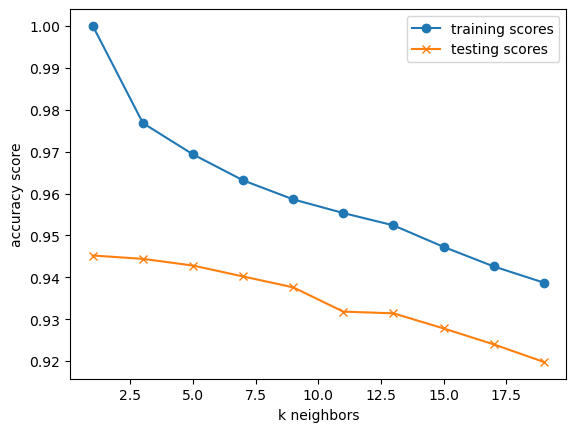

In [13]:
import matplotlib.pyplot as plt
# Loop through different k values to find which has the highest accuracy.
# Note: We use only odd numbers because we don't want any ties.
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train_encoded)
    train_score = knn.score(X_train_scaled, y_train_encoded)
    test_score = knn.score(X_test_scaled, y_test_encoded)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
# Plot the results
plt.plot(range(1, 20, 2), train_scores, marker='o', label="training scores")
plt.plot(range(1, 20, 2), test_scores, marker="x", label="testing scores")
plt.xlabel("k neighbors")
plt.ylabel("accuracy score")
plt.legend()
plt.show()

In [14]:
# Create the KNN model with 3 neighbors
knn_model = KNeighborsClassifier(n_neighbors=3)

# Fit the model to the training data
knn_model.fit(X_train_scaled, y_train_encoded)

KNeighborsClassifier(n_neighbors=3)

In [15]:
# Validate the model by checking the model accuracy with model.score
print(f"Training Data Score: {knn_model.score(X_train_scaled, y_train_encoded)}")
print(f"Testing Data Score: {knn_model.score(X_test_scaled, y_test_encoded)}")

Training Data Score: 0.9768
Testing Data Score: 0.9444


## Model and Fit to a Decision Tree Classifier

In [16]:
# Create the decision tree classifier model
dt_model = DecisionTreeClassifier()

# Fit the model to the training data
dt_model.fit(X_train_scaled, y_train_encoded)

DecisionTreeClassifier()

In [17]:
# Validate the model by checking the model accuracy with model.score
print(f"Training Data Score: {dt_model.score(X_train_scaled, y_train_encoded)}")
print(f"Testing Data Score: {dt_model.score(X_test_scaled, y_test_encoded)}")

Training Data Score: 1.0
Testing Data Score: 0.867


## Model and Fit to a Random Forest Classifier

In [18]:
# Create the random forest classifier model
# with n_estimators=128 and random_state=1
rf_model = RandomForestClassifier(n_estimators=128, random_state=1)

# Fit the model to the training data
rf_model.fit(X_train_scaled, y_train_encoded)

RandomForestClassifier(n_estimators=128, random_state=1)

In [19]:
# Validate the model by checking the model accuracy with model.score
print(f"Training Data Score: {rf_model.score(X_train_scaled, y_train_encoded)}")
print(f"Testing Data Score: {rf_model.score(X_test_scaled, y_test_encoded)}")

Training Data Score: 1.0
Testing Data Score: 0.964


## Model and Fit to a Gradient Boosting Classifier

In [20]:
# Train the Gradient Boosting classifier
clf = GradientBoostingClassifier(random_state=1).fit(X_train_scaled, y_train_encoded)

# Evaluate the model
print(f'Training Score: {clf.score(X_train_scaled, y_train_encoded)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test_encoded)}')

Training Score: 0.9622666666666667
Testing Score: 0.9152


## Model and Fit to an Adaptive Boosting Classifier

In [21]:
# Train the AdaBoostClassifier
clf = AdaBoostClassifier(random_state=1).fit(X_train_scaled, y_train_encoded)

# Evaluate the model
print(f'Training Score: {clf.score(X_train_scaled, y_train_encoded)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test_encoded)}')

Training Score: 0.274
Testing Score: 0.2776
